<a href="https://colab.research.google.com/github/KenjiPrayogo/ML-Capstone/blob/main/NN_Crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Crop_recommendation.csv')

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']



In [ ]:
# Encode the categorical labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(y_train)

        N    P    K  temperature   humidity        ph    rainfall
1656   17   16   14    16.396243  92.181519  6.625539  102.944161
752    37   79   19    27.543848  69.347863  7.143943   69.408782
892     7   73   25    27.521856  63.132153  7.288057   45.208411
1041  101   70   48    25.360592  75.031933  6.012697  116.553145
1179    0   17   30    35.474783  47.972305  6.279134   97.790725
...   ...  ...  ...          ...        ...       ...         ...
1638   10    5    5    21.213070  91.353492  7.817846  112.983436
1095  108   94   47    27.359116  84.546250  6.387431   90.812505
1130   11   36   31    27.920633  51.779659  6.475449  100.258567
1294   11  124  204    13.429886  80.066340  6.361141   71.400430
860    32   78   22    23.970814  62.355576  7.007038   53.409060

[1760 rows x 7 columns]
[16  2 10 ... 12  7 10]


In [ ]:
# Create a neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)


Epoch 1/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0384 - accuracy: 0.9835 - val_loss: 0.1317 - val_accuracy: 0.9591
Epoch 2/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0478 - accuracy: 0.9790 - val_loss: 0.1375 - val_accuracy: 0.9614
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 0.1448 - accuracy: 0.9653 - val_loss: 0.1507 - val_accuracy: 0.9500
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0475 - accuracy: 0.9824 - val_loss: 0.0921 - val_accuracy: 0.9545
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0427 - accuracy: 0.9784 - val_loss: 0.0888 - val_accuracy: 0.9636
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 0.9881 - val_loss: 0.0894 - val_accuracy: 0.9568
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9898 - val_loss: 0.1142 - val_accuracy: 0.9591
Epoch 8/100
5

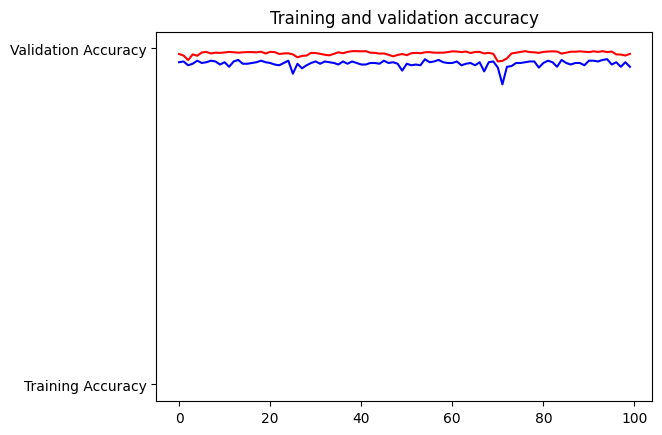

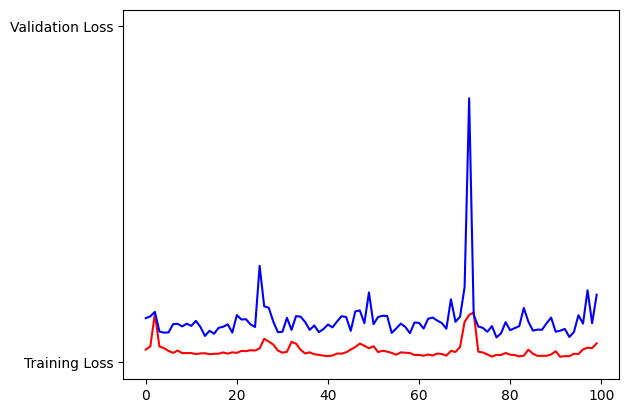

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
# Make predictions on new input
new_input = np.array([[10,6,5,28.96017885,91.69532178,6.585872508,24.7458198]])
predicted_label = np.argmax(model.predict(new_input), axis=-1)
predicted_crop = label_encoder.inverse_transform(predicted_label)
print("Predicted Crop:", predicted_crop)

1/1 [==============================] - 0s 24ms/step
Predicted Crop: ['mungbean']
